In [28]:
import nltk
import pandas as pd
import sklearn
from sklearn.cluster import KMeans
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
## For Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import os
import re   ## for regular expressions
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from scipy.cluster.hierarchy import ward, dendrogram
from wordcloud import WordCloud


####################################################
##
##  Clustering Text Data from a Corpus 
##
####################################################

path="/Users/jialichen/Desktop/501Module3Assignment/Corpus"

## Get the text data first
print("calling os...")
FileNameList=os.listdir(path)
## check the TYPE
print(FileNameList)

##-----------
## I need an empty list to start with to build a list of complete paths to files
## Notice that I defined path above. I also need a list of file names.
ListOfCompleteFilePaths=[]
ListOfJustFileNames=[]

for name in os.listdir(path):
    ## build the names dynamically....
    name=name.lower()
    print(path+ "/" + name)
    next=path+ "/" + name
    
    nextnameL=[re.findall(r'[a-z]+', name)[0]]  
    nextname=nextnameL[0]   ## Keep just the name

    
    ListOfCompleteFilePaths.append(next)
    ListOfJustFileNames.append(nextname)



calling os...
['Neural3.txt', 'Neural2.txt', 'Neural1.txt', 'SVM1.txt', 'SVM3.txt', 'SVM2.txt', 'Bayes3.txt', 'Bayes2.txt', 'Bayes1.txt']
/Users/jialichen/Desktop/501Module3Assignment/Corpus/neural3.txt
/Users/jialichen/Desktop/501Module3Assignment/Corpus/neural2.txt
/Users/jialichen/Desktop/501Module3Assignment/Corpus/neural1.txt
/Users/jialichen/Desktop/501Module3Assignment/Corpus/svm1.txt
/Users/jialichen/Desktop/501Module3Assignment/Corpus/svm3.txt
/Users/jialichen/Desktop/501Module3Assignment/Corpus/svm2.txt
/Users/jialichen/Desktop/501Module3Assignment/Corpus/bayes3.txt
/Users/jialichen/Desktop/501Module3Assignment/Corpus/bayes2.txt
/Users/jialichen/Desktop/501Module3Assignment/Corpus/bayes1.txt


In [29]:
####################################################
##  Create the Stemmer Function.........
######################################################
## Instantiate it
A_STEMMER=PorterStemmer()
#----------------------------------------
# Use NLTK's PorterStemmer in a function - DEFINE THE FUNCTION
#-------------------------------------------------------
def MY_STEMMER(str_input):
    ## Only use letters, no punct, no nums, make lowercase...
    words = re.sub(r"[^A-Za-z\-]", " ", str_input).lower().split()
    words = [A_STEMMER.stem(word) for word in words] ## Use the Stemmer...
    return words


##################################################################
## Tokenize and Vectorize the text data from the corpus...
##############################################################

## Instantiate Tf-idf vectorizer
MyVectTFIdf=TfidfVectorizer(input='filename',
                        stop_words='english',
                        max_features=500,
                        token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b'  #a word that has at least two word characters
                        )



## Now I can vectorize using my list of complete paths to my files
DTM_TF=MyVectTFIdf.fit_transform(ListOfCompleteFilePaths)


#####################
## Get the complete vocab - the column names
## !!!!!!!!! FOr TF and CV - but NOT for stemmed...!!!
##################
ColumnNames=MyVectTFIdf.get_feature_names()
print("The vocab is: ", ColumnNames, "\n\n")


## Use pandas to create data frames
DF_TF=pd.DataFrame(DTM_TF.toarray(),columns=ColumnNames)
print(DF_TF)


for nextcol in DF_TF.columns:
    if(re.search(r'[^A-Za-z]+', nextcol)):  ## find non chars
        DF_TF=DF_TF.drop([nextcol], axis=1)
    elif(len(str(nextcol))<=3):
        DF_TF=DF_TF.drop([nextcol], axis=1)
        
## CHECK IT!
print(DF_TF.head())




############ --------------->
## OK - now we have vectorized the data - and removed punct, numbers, etc.
## From here, we can update the names of the rows without adding labels 
## to the data.
## We CANNOT have labels in the data because:
## 1) Labels are not numeric and (2) Labels are NOT data - they are labels.
#############

## Now update the row names
MyDict={}
for i in range(0, len(ListOfJustFileNames)):
    MyDict[i] = ListOfJustFileNames[i]

print("MY DICT:", MyDict)
        

DF_TF=DF_TF.rename(MyDict, axis="index")
print(DF_TF)



The vocab is:  ['ability', 'abnormal', 'abstract', 'access', 'according', 'account', 'accuracy', 'accurate', 'activities', 'actual', 'actually', 'al', 'alarm', 'algorithm', 'algorithms', 'allow', 'allows', 'amounts', 'analysis', 'application', 'applications', 'applied', 'approach', 'approaches', 'april', 'architecture', 'area', 'artificial', 'asp', 'associated', 'atm', 'attribute', 'attributes', 'autoencoder', 'automatic', 'available', 'average', 'b', 'balance', 'bank', 'banking', 'banks', 'based', 'bayes', 'bayesian', 'behavior', 'behaviors', 'belief', 'best', 'better', 'big', 'binary', 'bpn', 'build', 'building', 'built', 'c', 'calculated', 'calculation', 'called', 'card', 'cardholder', 'cards', 'case', 'cases', 'cash', 'chosen', 'citations', 'class', 'classes', 'classification', 'classified', 'classifier', 'classify', 'com', 'comparison', 'complex', 'computational', 'computer', 'computing', 'conclusion', 'conference', 'confusion', 'connected', 'considered', 'consists', 'contains', '

[ 4.62055544 -2.10296994 -7.94115896  8.00528329  3.78939598 -2.74535359
 -2.86217594 -8.15644286  7.39286658]


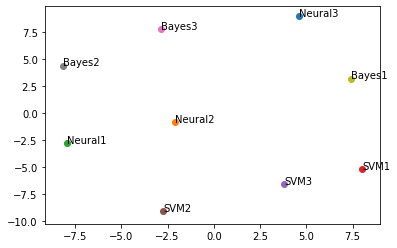

[ 0.35665994 -0.434424   -0.55788035  0.20978457  0.51111051  0.14060998
 -0.23718376 -0.76489005  0.77621314]


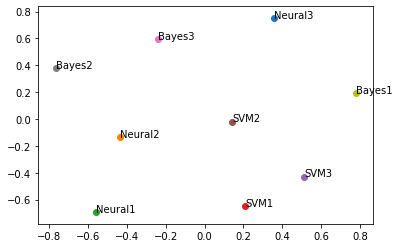

[-0.45120934 -0.21528713 -0.4135901   0.24483353  0.29406596  0.03873817
  0.1723123   0.43098121 -0.10084461]


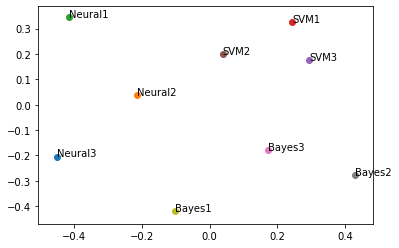

In [30]:
#Measure of distance that takes into account the length of the document: called cosine similarity
cosdist = 1 - cosine_similarity(DTM_TF)

from sklearn.metrics.pairwise import euclidean_distances
## Distance between each pair of rows (vectors)
Euc_dist=euclidean_distances(DTM_TF)

from sklearn.metrics.pairwise import manhattan_distances
Man_dist=manhattan_distances(DTM_TF)

## Visualizing Distances
##An option for visualizing distances is to assign a point in a plane
## to each text such that the distance between points is proportional 
## to the pairwise euclidean or cosine distances.
## This type of visualization is called multidimensional scaling (MDS) 
## in scikit-learn (and R  -  mdscale).


############################

mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
## "precomputed" means I will give the dist (as manhattan dis)
pos = mds.fit_transform(Man_dist)  # shape (n_components, n_samples)
xs, ys = pos[:, 0], pos[:, 1]
print(xs)
names=["Neural3", "Neural2", "Neural1", "SVM1", "SVM3", "SVM2", "Bayes3", "Bayes2", "Bayes1"]

for x, y, name in zip(xs, ys, names):
    plt.scatter(x, y)
    plt.text(x, y, name)

plt.show()



############################

mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
## "precomputed" means I will give the dist (as Euc_dist)
pos = mds.fit_transform(Euc_dist)  # shape (n_components, n_samples)
xs, ys = pos[:, 0], pos[:, 1]
print(xs)
names=["Neural3", "Neural2", "Neural1", "SVM1", "SVM3", "SVM2", "Bayes3", "Bayes2", "Bayes1"]

for x, y, name in zip(xs, ys, names):
    plt.scatter(x, y)
    plt.text(x, y, name)

plt.show()


############################

mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
## "precomputed" means I will give the dist (as cosine sim)
pos = mds.fit_transform(cosdist)  # shape (n_components, n_samples)
xs, ys = pos[:, 0], pos[:, 1]
print(xs)
names=["Neural3", "Neural2", "Neural1", "SVM1", "SVM3", "SVM2", "Bayes3", "Bayes2", "Bayes1"]

for x, y, name in zip(xs, ys, names):
    plt.scatter(x, y)
    plt.text(x, y, name)

plt.show()


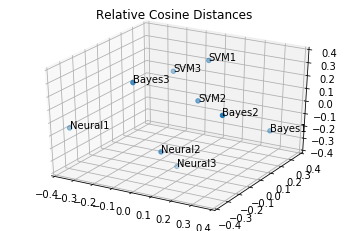

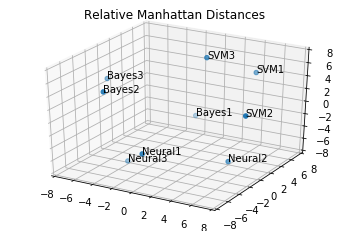

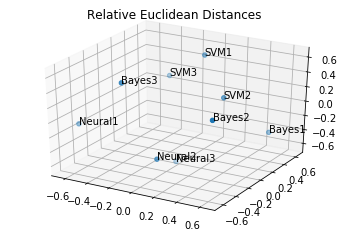

In [31]:
##cosdist PLotting the relative distances in 3D 
mds = MDS(n_components=3, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(cosdist)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pos[:, 0], pos[:, 1], pos[:, 2])
#print(pos[:,2])
for x, y, z, s in zip(pos[:, 0], pos[:, 1], pos[:, 2], names):
    ax.text(x, y, z, s)

ax.set_xlim3d(-0.4,0.4) #stretch out the x axis
ax.set_ylim3d(-0.4,0.4) #stretch out the y axis
ax.set_zlim3d(-0.4,0.4) #stretch out the z axis
plt.title("Relative Cosine Distances")
plt.show()


##Man_dist PLotting the relative distances in 3D
mds = MDS(n_components=3, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(Man_dist)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pos[:, 0], pos[:, 1], pos[:, 2])
#print(pos[:,2])
for x, y, z, s in zip(pos[:, 0], pos[:, 1], pos[:, 2], names):
    ax.text(x, y, z, s)

ax.set_xlim3d(-8,8) #stretch out the x axis
ax.set_ylim3d(-8,8) #stretch out the y axis
ax.set_zlim3d(-8,8) #stretch out the z axis
plt.title("Relative Manhattan Distances")
plt.show()

##Euclidean_dist PLotting the relative distances in 3D
mds = MDS(n_components=3, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(Euc_dist)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pos[:, 0], pos[:, 1], pos[:, 2])
#print(pos[:,2])
for x, y, z, s in zip(pos[:, 0], pos[:, 1], pos[:, 2], names):
    ax.text(x, y, z, s)

ax.set_xlim3d(-0.7,0.7) #stretch out the x axis
ax.set_ylim3d(-0.7,0.7) #stretch out the y axis
ax.set_zlim3d(-0.7,0.7) #stretch out the z axis
plt.title("Relative Euclidean Distances")
plt.show()







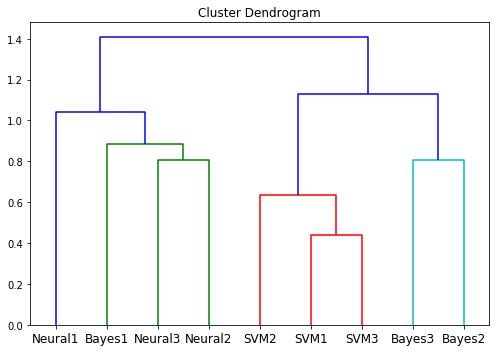

In [52]:
## Clustering Texts and Visualizing 
#One method for clustering is Ward’s
#Ward’s method produces a hierarchy of clusterings
# Ward’s method requires  a set of pairwise distance measurements
######### Alternative - this works
linkage_matrix = ward(cosdist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(7, 5)) # set size
ax = dendrogram(linkage_matrix, orientation="top", labels=names);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    labelbottom='off')
plt.title('Cluster Dendrogram')
plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('hier_cos.png', dpi=200) #save figure as ward_clusters


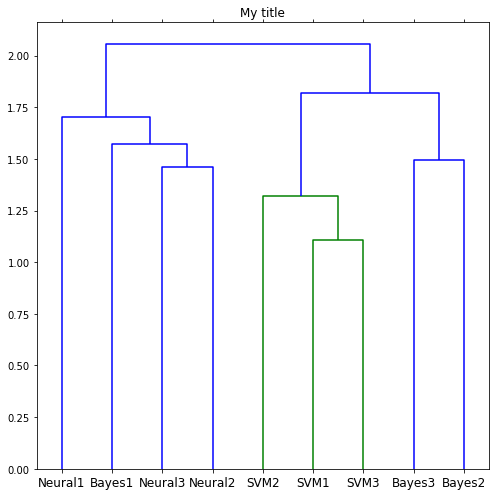

In [50]:
###################
linkage_matrix = ward(Euc_dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(7, 7)) # set size
ax = dendrogram(linkage_matrix, labels=names);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('hier_euc.png', dpi=200) #save figure as ward_clusters   

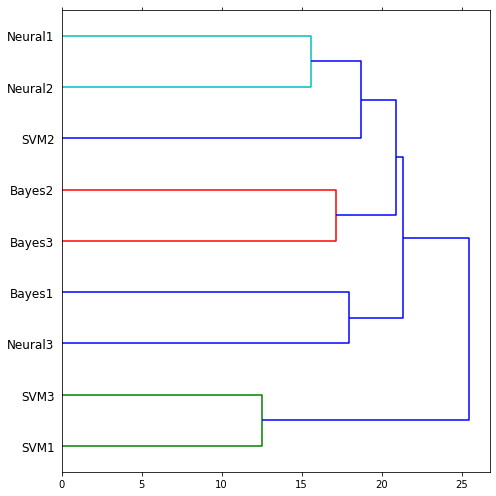

In [34]:
###################
linkage_matrix = ward(Man_dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(7, 7)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=names);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('hier_manh.png', dpi=200) #save figure as ward_clusters   Man_dist

In [35]:
ColumnNames=MyVectTFIdf.get_feature_names()
print("The vocab is: ", ColumnNames, "\n\n")


## Use pandas to create data frames
DF_TF=pd.DataFrame(DTM_TF.toarray(),columns=ColumnNames)

################################################
##           Let's Cluster........
################################################

kmeans_object_Count = sklearn.cluster.KMeans(n_clusters=2)
#print(kmeans_object)
kmeans_object_Count.fit(DF_TF)
# Get cluster assignment labels
labels = kmeans_object_Count.labels_
prediction_kmeans = kmeans_object_Count.predict(DF_TF)
# Format results as a DataFrame
Myresults = pd.DataFrame([DF_TF.index,labels]).T


The vocab is:  ['ability', 'abnormal', 'abstract', 'access', 'according', 'account', 'accuracy', 'accurate', 'activities', 'actual', 'actually', 'al', 'alarm', 'algorithm', 'algorithms', 'allow', 'allows', 'amounts', 'analysis', 'application', 'applications', 'applied', 'approach', 'approaches', 'april', 'architecture', 'area', 'artificial', 'asp', 'associated', 'atm', 'attribute', 'attributes', 'autoencoder', 'automatic', 'available', 'average', 'b', 'balance', 'bank', 'banking', 'banks', 'based', 'bayes', 'bayesian', 'behavior', 'behaviors', 'belief', 'best', 'better', 'big', 'binary', 'bpn', 'build', 'building', 'built', 'c', 'calculated', 'calculation', 'called', 'card', 'cardholder', 'cards', 'case', 'cases', 'cash', 'chosen', 'citations', 'class', 'classes', 'classification', 'classified', 'classifier', 'classify', 'com', 'comparison', 'complex', 'computational', 'computer', 'computing', 'conclusion', 'conference', 'confusion', 'connected', 'considered', 'consists', 'contains', '

In [ ]:
#load the data
df=pd.read_csv('/Users/jialichen/Downloads/creditcard.csv')

#sample a fraction of the dataset 
df = df.sample(frac=0.1, random_state=1)

#This dataset has a label
TrueLabel=df["Class"]
#remove label
df=df.drop(['Class'], axis=1) #axis = 1 is for columns

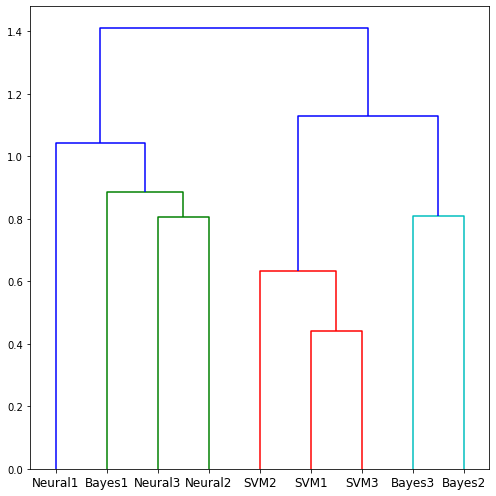

In [47]:
#create heat map 
corrmat = df.corr()
fig = plt.figure(figsize = (12,9))

sns.heatmap(corrmat, vmax=0.8, square=True)
plt.show

#a lot of the values close to zero, there is no strong relationships between V parameters